<a href="https://colab.research.google.com/github/sdikici/Time_Series_Experiments/blob/main/Prophet_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d albertovidalrod/electricity-consumption-uk-20092022
! unzip electricity-consumption-uk-20092022.zip

 26% 5.00M/19.2M [00:00<00:00, 23.2MB/s]
100% 19.2M/19.2M [00:00<00:00, 68.7MB/s]
Archive:  electricity-consumption-uk-20092022.zip
  inflating: historic_demand_2009_2024.csv  
  inflating: historic_demand_2009_2024_noNaN.csv  
  inflating: historic_demand_year_2009.csv  
  inflating: historic_demand_year_2010.csv  
  inflating: historic_demand_year_2011.csv  
  inflating: historic_demand_year_2012.csv  
  inflating: historic_demand_year_2013.csv  
  inflating: historic_demand_year_2014.csv  
  inflating: historic_demand_year_2015.csv  
  inflating: historic_demand_year_2016.csv  
  inflating: historic_demand_year_2017.csv  
  inflating: historic_demand_year_2018.csv  
  inflating: historic_demand_year_2019.csv  
  inflating: historic_demand_year_2020.csv  
  inflating: historic_demand_year_2021.csv  
  inflating: historic_demand_year_2022.csv  
  inflating: historic_demand_year_2023.csv  
  inflating: historic_demand_year_2024.csv  


In [ ]:
!kaggle datasets download -d sercandikici/london-weather-database-from-2009-to-2024
! unzip london-weather-database-from-2009-to-2024.zip

  0% 0.00/301k [00:00<?, ?B/s]
100% 301k/301k [00:00<00:00, 105MB/s]
Archive:  london-weather-database-from-2009-to-2024.zip
  inflating: London_2009_to_2024_forecast.csv  


In [ ]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df_raw = pd.read_csv("historic_demand_2009_2024_noNaN.csv")
df_raw

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
0,2009-01-01 00:00:00,1,0:00:00,37910,38704,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1
1,2009-01-01 00:30:00,2,0:30:00,38047,38964,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1
2,2009-01-01 01:00:00,3,1:00:00,37380,38651,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1
3,2009-01-01 01:30:00,4,1:30:00,36426,37775,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1
4,2009-01-01 02:00:00,5,2:00:00,35687,37298,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263725,2024-02-01 21:30:00,44,21:30:00,30390,31489,28527,3207,6562,0,15905,0,11,335,-4,436,-178,-57,-146,0
263726,2024-02-01 22:00:00,45,22:00:00,28382,29435,26713,3287,6562,0,15905,0,12,189,-4,114,-35,11,-254,0
263727,2024-02-01 22:30:00,46,22:30:00,26693,27763,25119,3366,6562,0,15905,0,12,175,-4,105,-49,0,-254,0
263728,2024-02-01 23:00:00,47,23:00:00,24773,25657,23356,3408,6562,0,15905,0,17,-101,-4,285,-22,0,210,0


In [ ]:
df3_year = df_raw[["settlement_date","tsd"]]
df3_year = df3_year[(df3_year["settlement_date"] >= "2009-01-01 00:00:00")&(df3_year["settlement_date"] <= "2011-12-31 23:30:00")]
df3_year

,settlement_date,tsd
0,2009-01-01 00:00:00,38704
1,2009-01-01 00:30:00,38964
2,2009-01-01 01:00:00,38651
3,2009-01-01 01:30:00,37775
4,2009-01-01 02:00:00,37298
...,...,...
52261,2011-12-31 21:30:00,31982
52262,2011-12-31 22:00:00,31145
52263,2011-12-31 22:30:00,30803
52264,2011-12-31 23:00:00,30441


get daily mean data

In [ ]:
df3_year['settlement_date'] = pd.to_datetime(df3_year['settlement_date'])
df3_year['settlement_date'] = df3_year['settlement_date'].dt.floor('D')
df3_year

<ipython-input-9-e81cd3b80d0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_year['settlement_date'] = pd.to_datetime(df3_year['settlement_date'])
<ipython-input-9-e81cd3b80d0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_year['settlement_date'] = df3_year['settlement_date'].dt.floor('D')


,settlement_date,tsd
0,2009-01-01,38704
1,2009-01-01,38964
2,2009-01-01,38651
3,2009-01-01,37775
4,2009-01-01,37298
...,...,...
52261,2011-12-31,31982
52262,2011-12-31,31145
52263,2011-12-31,30803
52264,2011-12-31,30441


In [ ]:
daily = df3_year.groupby('settlement_date').agg({'tsd': 'mean'}).reset_index()
daily

,settlement_date,tsd
0,2009-01-01,38528.395833
1,2009-01-02,41133.458333
2,2009-01-03,40667.791667
3,2009-01-04,41013.958333
4,2009-01-05,47322.312500
...,...,...
1084,2011-12-27,33447.875000
1085,2011-12-28,35252.062500
1086,2011-12-29,36492.541667
1087,2011-12-30,37148.395833


In [ ]:
daily["settlement_date"] = pd.to_datetime(daily["settlement_date"])
daily.set_index("settlement_date", inplace=True)
daily

,tsd
settlement_date,
2009-01-01,38528.395833
2009-01-02,41133.458333
2009-01-03,40667.791667
2009-01-04,41013.958333
2009-01-05,47322.312500
...,...
2011-12-27,33447.875000
2011-12-28,35252.062500
2011-12-29,36492.541667


In [ ]:
df = daily.copy()
df["Date"] = df.index
df.columns=["y","ds"]
df

,y,ds
settlement_date,,
2009-01-01,38528.395833,2009-01-01
2009-01-02,41133.458333,2009-01-02
2009-01-03,40667.791667,2009-01-03
2009-01-04,41013.958333,2009-01-04
2009-01-05,47322.312500,2009-01-05
...,...,...
2011-12-27,33447.875000,2011-12-27
2011-12-28,35252.062500,2011-12-28
2011-12-29,36492.541667,2011-12-29


In [ ]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/my35qkkq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/hxfar30j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=289', 'data', 'file=/tmp/tmptwry0a66/my35qkkq.json', 'init=/tmp/tmptwry0a66/hxfar30j.json', 'output', 'file=/tmp/tmptwry0a66/prophet_model8vbkzmkr/prophet_model-20240227175443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:54:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:54:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
periods = 30
future = m.make_future_dataframe(periods=periods)
future.tail()

,ds
1114,2012-01-26
1115,2012-01-27
1116,2012-01-28
1117,2012-01-29
1118,2012-01-30


In [ ]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1114,2012-01-26,33893.889588,40598.504012,44348.453380,33850.980219,33934.456179,8692.591220,8692.591220,8692.591220,1746.636410,1746.636410,1746.636410,6945.954809,6945.954809,6945.954809,0.0,0.0,0.0,42586.480808
1115,2012-01-27,33879.255657,39720.290940,43590.939541,33832.211603,33923.176722,7694.996612,7694.996612,7694.996612,824.570820,824.570820,824.570820,6870.425792,6870.425792,6870.425792,0.0,0.0,0.0,41574.252269
1116,2012-01-28,33864.621726,35439.702617,39349.412349,33813.883935,33914.044929,3532.688435,3532.688435,3532.688435,-3246.721882,-3246.721882,-3246.721882,6779.410317,6779.410317,6779.410317,0.0,0.0,0.0,37397.310160
1117,2012-01-29,33849.987794,34397.837881,38420.108532,33794.210721,33906.020220,2539.718771,2539.718771,2539.718771,-4135.588004,-4135.588004,-4135.588004,6675.306776,6675.306776,6675.306776,0.0,0.0,0.0,36389.706566
1118,2012-01-30,33835.353863,39334.372010,43343.203931,33773.560184,33896.320151,7512.013287,7512.013287,7512.013287,951.367268,951.367268,951.367268,6560.646018,6560.646018,6560.646018,0.0,0.0,0.0,41347.367150


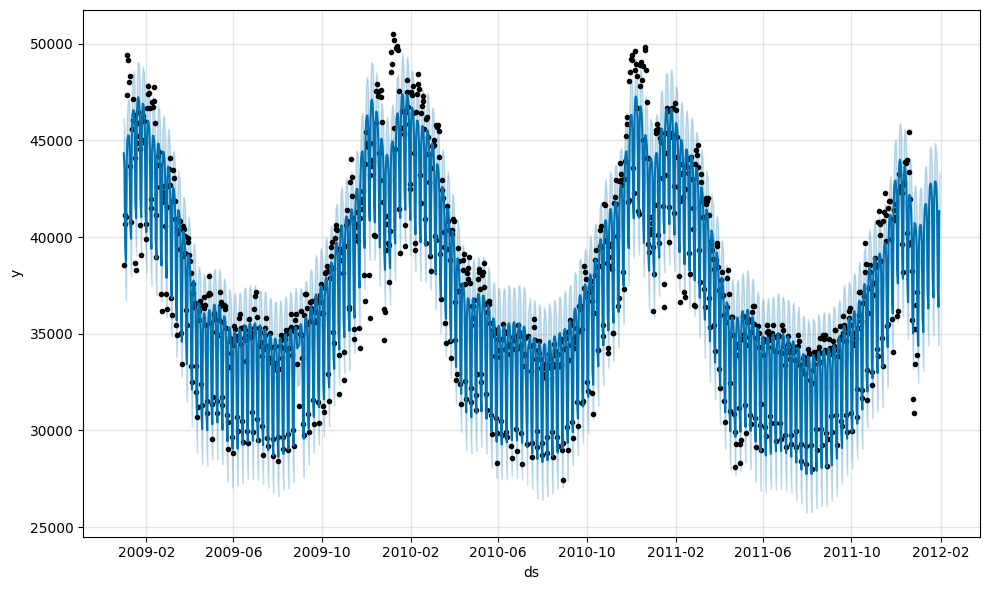

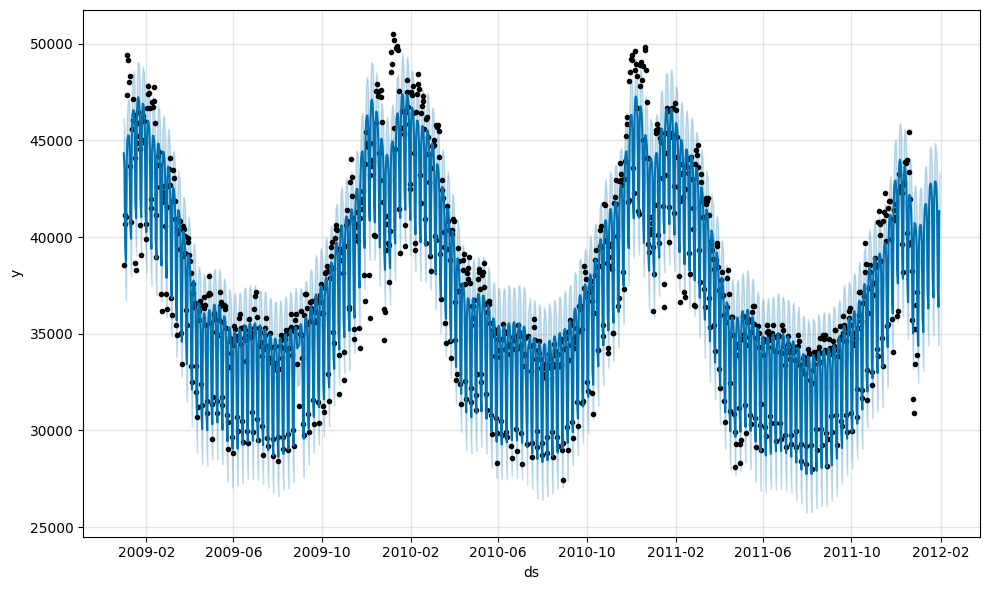

In [ ]:
m.plot(forecast)

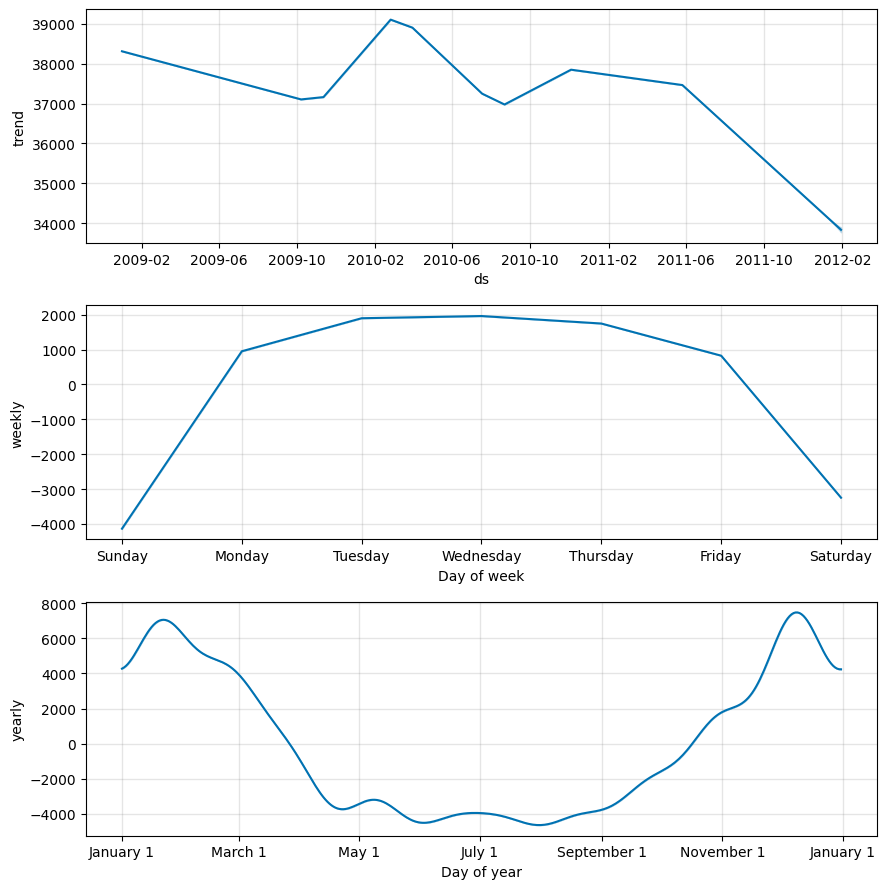

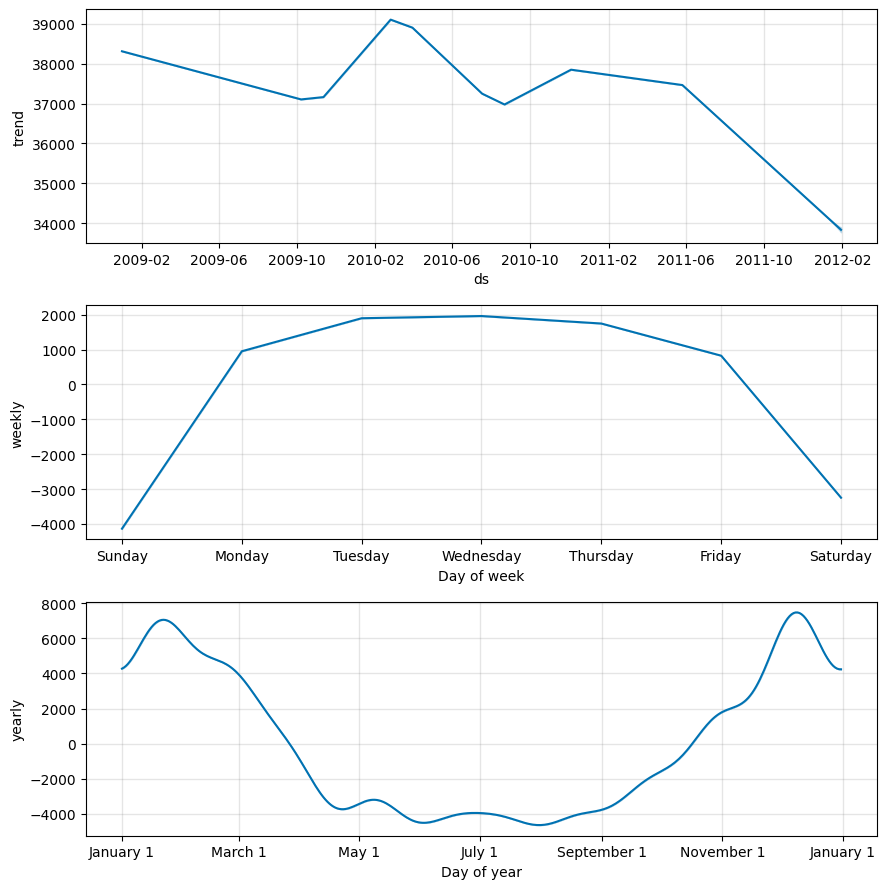

In [ ]:
m.plot_components(forecast)


Performance and cross validation

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(m,
                         initial="720 days",#initial training points
                         period="30 days", #step size
                         horizon="60 days")# numnber of steps to forecast

INFO:prophet:Making 11 forecasts with cutoffs between 2011-01-05 00:00:00 and 2011-11-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/x6_l7f48.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/l59jk582.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56646', 'data', 'file=/tmp/tmptwry0a66/x6_l7f48.json', 'init=/tmp/tmptwry0a66/l59jk582.json', 'output', 'file=/tmp/tmptwry0a66/prophet_modelf5wrtuk5/prophet_model-20240227175447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:54:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:54:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/2agu4atq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/wdz2d17w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
from prophet.diagnostics import performance_metrics

pm = performance_metrics(df_cv)
pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,2.035493e+06,1426.706934,1091.490549,0.029612,0.020719,0.029466,0.757576
1,7 days,2.181927e+06,1477.134860,1135.826512,0.030583,0.025353,0.030438,0.757576
2,8 days,2.669105e+06,1633.739613,1239.399723,0.033040,0.028714,0.032854,0.757576
3,9 days,3.201377e+06,1789.239199,1351.901051,0.035914,0.029680,0.035665,0.742424
4,10 days,3.758070e+06,1938.574325,1476.372573,0.039467,0.034975,0.039165,0.712121
5,11 days,4.414675e+06,2101.112819,1592.767550,0.042906,0.037655,0.042475,0.712121
6,12 days,4.648045e+06,2155.932596,1645.705393,0.044396,0.038636,0.043882,0.757576
7,13 days,4.783231e+06,2187.059961,1655.904997,0.044567,0.039138,0.044033,0.757576
8,14 days,4.376268e+06,2091.953067,1560.831322,0.041965,0.037893,0.041514,0.757576
9,15 days,3.842311e+06,1960.181256,1467.630797,0.039529,0.037386,0.039266,0.787879


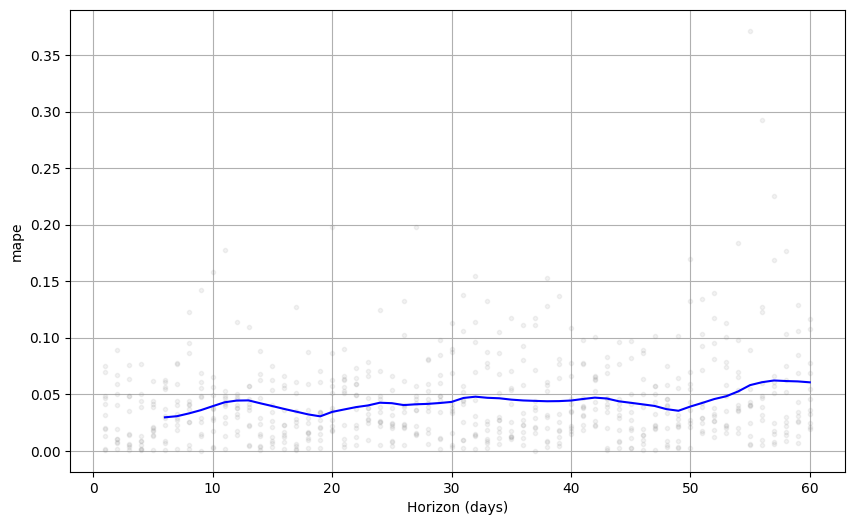

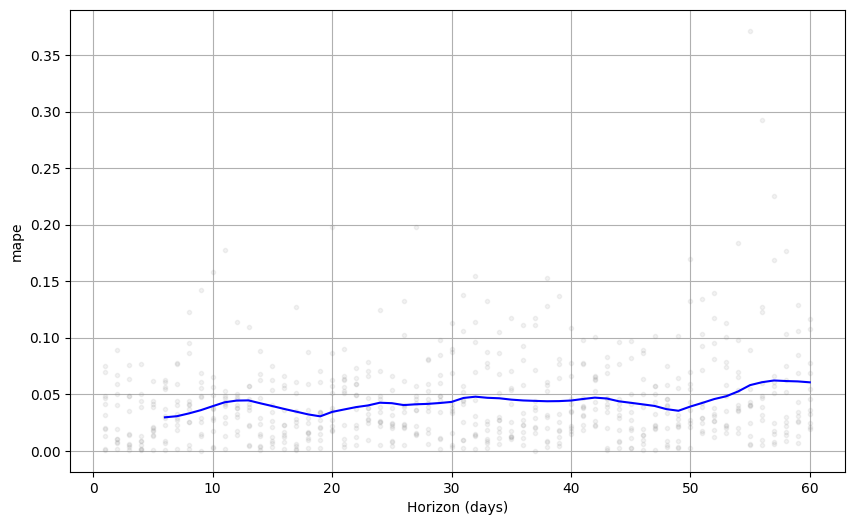

In [ ]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,metric="mape")

Add holidays

In [ ]:
m2 = Prophet()
m2.add_country_holidays(country_name="UK")
m2.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/pyylakj_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/3aqhg2k7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14187', 'data', 'file=/tmp/tmptwry0a66/pyylakj_.json', 'init=/tmp/tmptwry0a66/3aqhg2k7.json', 'output', 'file=/tmp/tmptwry0a66/prophet_modeld2bhce4b/prophet_model-20240227175452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:54:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:54:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


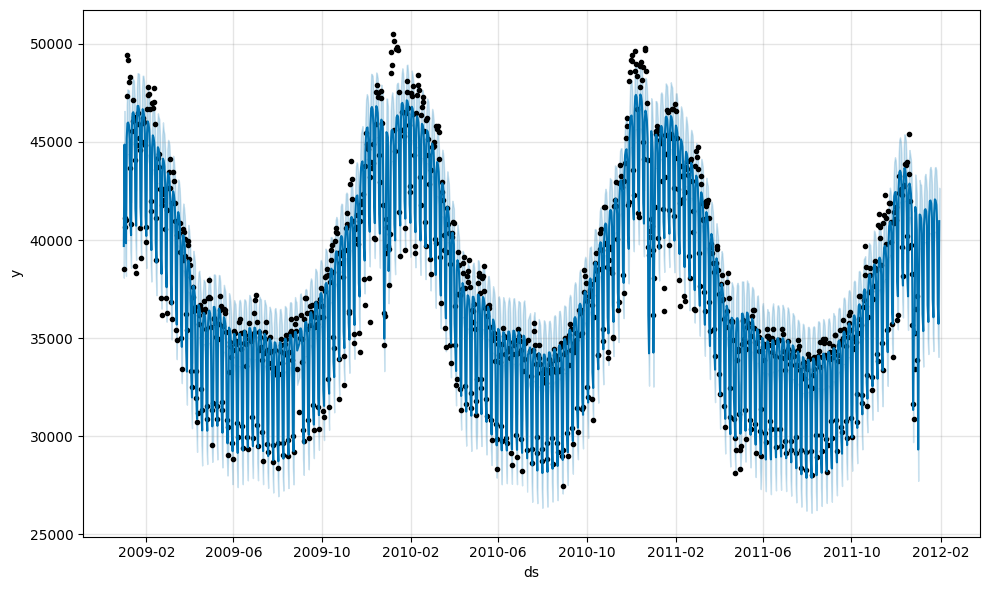

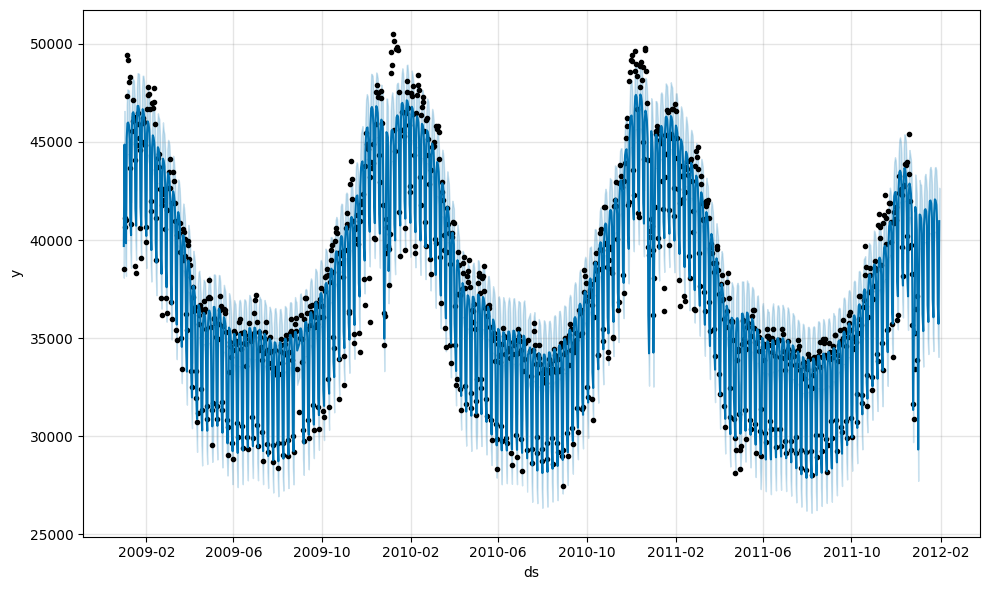

In [ ]:
future2 = m2.make_future_dataframe(periods=periods)
forecast2 = m2.predict(future2)
m2.plot(forecast2)

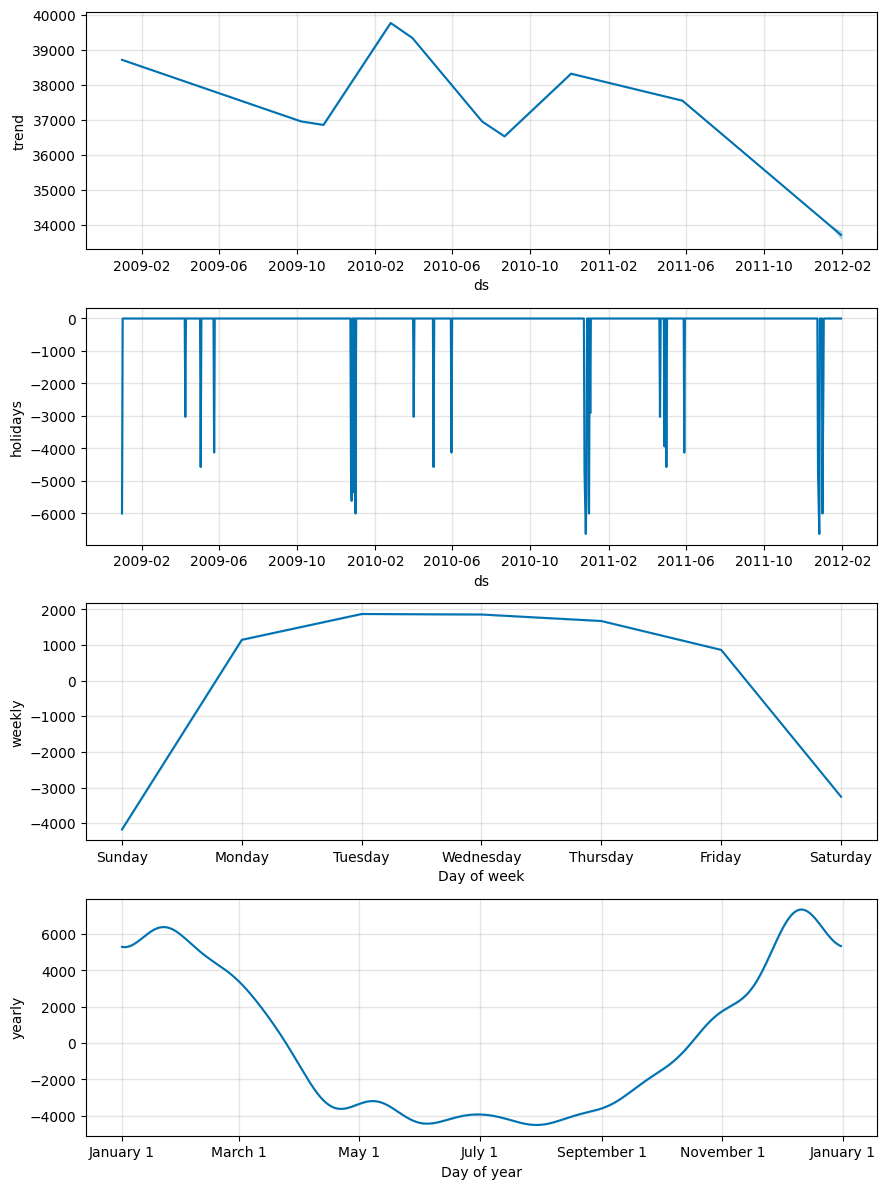

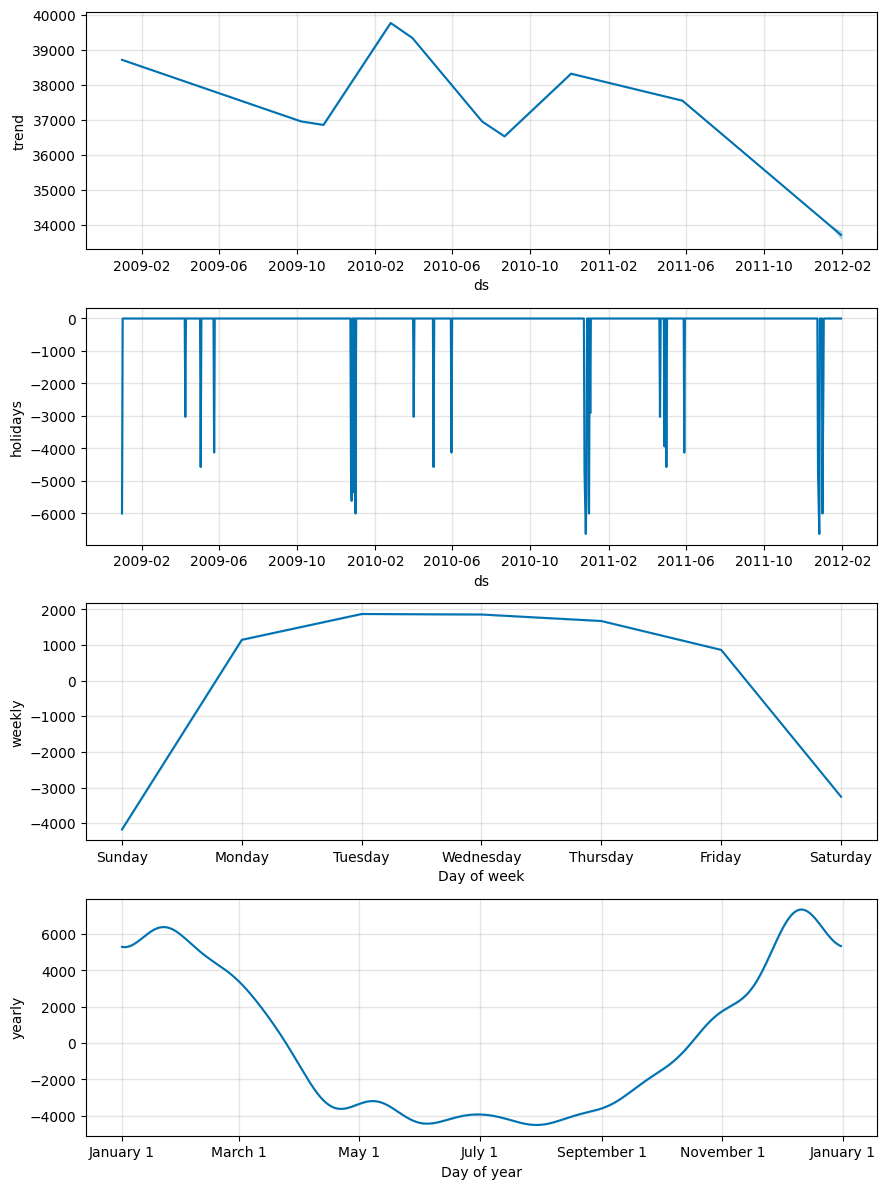

In [ ]:
m2.plot_components(forecast2)

In [ ]:
df_cv2 = cross_validation(m2,
                         initial="720 days",#initial training points
                         period="30 days", #step size
                         horizon="60 days")# numnber of steps to forecast

INFO:prophet:Making 11 forecasts with cutoffs between 2011-01-05 00:00:00 and 2011-11-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/7686kw91.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/8pdj_jz6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67433', 'data', 'file=/tmp/tmptwry0a66/7686kw91.json', 'init=/tmp/tmptwry0a66/8pdj_jz6.json', 'output', 'file=/tmp/tmptwry0a66/prophet_modelnjv1gwkt/prophet_model-20240227175456.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:54:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:54:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/ninsvjkh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/c4wkc44d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
pm2 = performance_metrics(df_cv2)
pm2

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,2.353633e+06,1534.155563,1134.219063,0.030115,0.022108,0.029740,0.727273
1,7 days,2.516937e+06,1586.485867,1167.239384,0.030803,0.024178,0.030426,0.742424
2,8 days,3.102278e+06,1761.328414,1261.795404,0.033090,0.025718,0.032646,0.712121
3,9 days,3.615800e+06,1901.525714,1356.121114,0.035508,0.029076,0.034994,0.696970
4,10 days,4.204256e+06,2050.428173,1475.259894,0.038917,0.030827,0.038315,0.696970
5,11 days,4.804997e+06,2192.030385,1559.951843,0.041567,0.031787,0.040822,0.696970
6,12 days,5.045682e+06,2246.259662,1595.303969,0.042590,0.031787,0.041762,0.712121
7,13 days,5.105363e+06,2259.505092,1587.698574,0.042353,0.032430,0.041509,0.727273
8,14 days,4.580111e+06,2140.119400,1473.494867,0.039224,0.030756,0.038493,0.742424
9,15 days,3.922529e+06,1980.537574,1370.158909,0.036527,0.029802,0.036006,0.757576


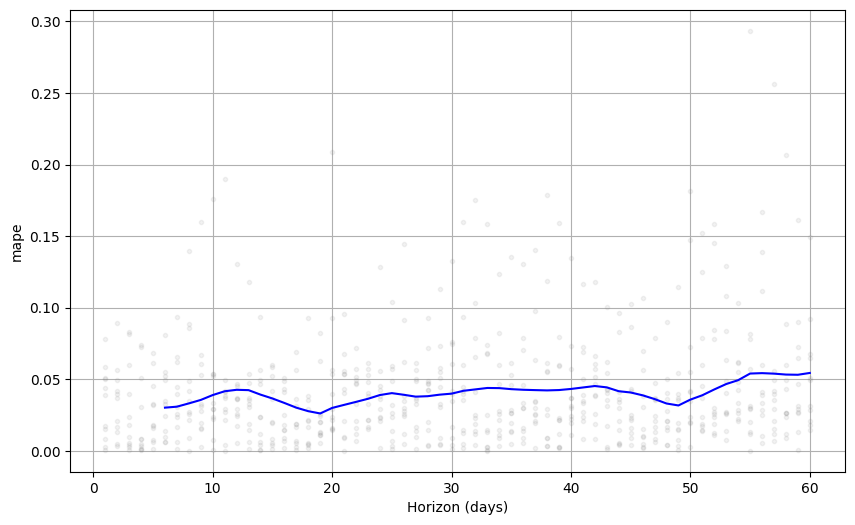

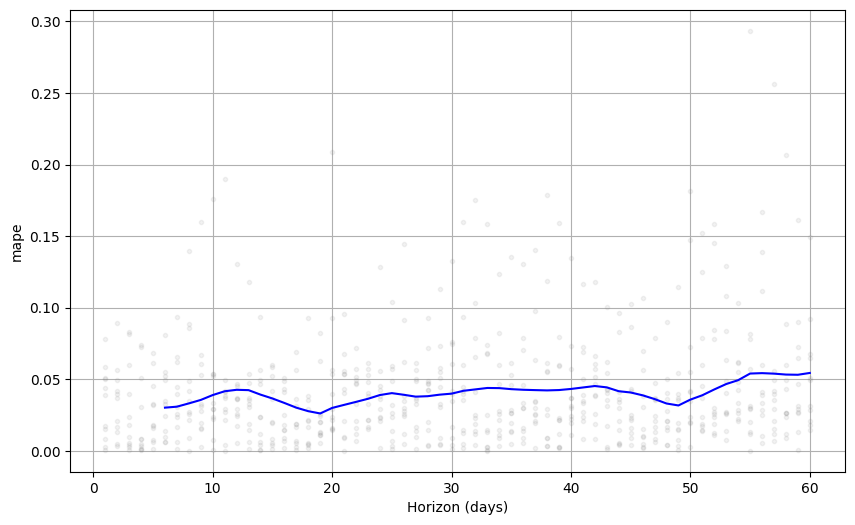

In [ ]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv2,metric="mape")

we are going to add regressor - weather

In [ ]:
df

,y,ds
settlement_date,,
2009-01-01,38528.395833,2009-01-01
2009-01-02,41133.458333,2009-01-02
2009-01-03,40667.791667,2009-01-03
2009-01-04,41013.958333,2009-01-04
2009-01-05,47322.312500,2009-01-05
...,...,...
2011-12-27,33447.875000,2011-12-27
2011-12-28,35252.062500,2011-12-28
2011-12-29,36492.541667,2011-12-29


In [ ]:
df_weather = pd.read_csv("London_2009_to_2024_forecast.csv")
df_weather

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,London,2009-01-01,2.7,0.0,1.2,0.6,-3.0,-1.0,-1.2,84.0,...,NaN,NaN,NaN,2009-01-01T08:06:15,2009-01-01T16:02:16,0.17,Overcast,Cloudy skies throughout the day.,cloudy,"03769099999,03660099999,03672099999,0378109999..."
1,London,2009-01-02,4.6,-0.6,2.1,1.3,-3.6,-0.6,-0.5,83.4,...,NaN,NaN,NaN,2009-01-02T08:06:07,2009-01-02T16:03:21,0.20,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"03769099999,03660099999,03672099999,0378109999..."
2,London,2009-01-03,3.0,-4.9,-1.7,2.2,-7.1,-3.0,-5.2,78.3,...,NaN,NaN,NaN,2009-01-03T08:05:55,2009-01-03T16:04:29,0.24,Clear,Clear conditions throughout the day.,clear-day,"03769099999,03660099999,03672099999,0378109999..."
3,London,2009-01-04,0.1,-5.8,-2.6,-2.5,-8.9,-4.7,-4.5,87.0,...,NaN,NaN,NaN,2009-01-04T08:05:40,2009-01-04T16:05:39,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03769099999,03660099999,03672099999,0378109999..."
4,London,2009-01-05,1.8,-2.0,0.0,-2.7,-6.8,-4.2,-2.8,82.3,...,NaN,NaN,NaN,2009-01-05T08:05:22,2009-01-05T16:06:52,0.31,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"03769099999,03660099999,03672099999,0378109999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5505,London,2024-01-28,11.5,3.1,7.0,11.5,0.5,5.4,4.1,82.4,...,4.6,3.0,10.0,2024-01-28T07:45:32,2024-01-28T16:41:51,0.59,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03769099999,03680099999,D4121,03781099999,0367..."
5506,London,2024-01-29,12.1,8.6,10.8,12.1,7.2,10.5,8.8,87.3,...,3.1,2.0,10.0,2024-01-29T07:44:08,2024-01-29T16:43:39,0.62,Overcast,Cloudy skies throughout the day.,cloudy,"03769099999,03680099999,D4121,03781099999,0367..."
5507,London,2024-01-30,12.5,7.6,9.1,12.5,4.9,7.5,5.3,77.5,...,1.4,1.0,10.0,2024-01-30T07:42:42,2024-01-30T16:45:26,0.66,Overcast,Cloudy skies throughout the day.,cloudy,"03769099999,03680099999,D4121,03781099999,0367..."
5508,London,2024-01-31,12.1,6.8,8.8,12.1,4.3,7.5,4.1,72.5,...,2.3,1.0,10.0,2024-01-31T07:41:14,2024-01-31T16:47:14,0.69,"Rain, Overcast",Cloudy skies throughout the day with morning r...,rain,"03769099999,03680099999,D4121,03781099999,0367..."


In [ ]:
weather3_year = df_weather[["datetime","temp"]]
weather3_year = weather3_year[(weather3_year["datetime"] >= "2009-01-01")&(weather3_year["datetime"] <= "2011-12-31")]
weather3_year["datetime"] = pd.to_datetime(weather3_year["datetime"])
weather3_year

,datetime,temp
0,2009-01-01,1.2
1,2009-01-02,2.1
2,2009-01-03,-1.7
3,2009-01-04,-2.6
4,2009-01-05,0.0
...,...,...
1090,2011-12-27,10.1
1091,2011-12-28,9.1
1092,2011-12-29,7.5
1093,2011-12-30,6.8


In [ ]:
merged_df=pd.merge(df,weather3_year,left_on=df["ds"].dt.date,right_on=weather3_year["datetime"].dt.date,how="inner")
merged_df = merged_df.drop(columns=['datetime'])
merged_df

,key_0,y,ds,temp
0,2009-01-01,38528.395833,2009-01-01,1.2
1,2009-01-02,41133.458333,2009-01-02,2.1
2,2009-01-03,40667.791667,2009-01-03,-1.7
3,2009-01-04,41013.958333,2009-01-04,-2.6
4,2009-01-05,47322.312500,2009-01-05,0.0
...,...,...,...,...
1084,2011-12-27,33447.875000,2011-12-27,10.1
1085,2011-12-28,35252.062500,2011-12-28,9.1
1086,2011-12-29,36492.541667,2011-12-29,7.5
1087,2011-12-30,37148.395833,2011-12-30,6.8


In [ ]:
merged_df["ds"] = pd.to_datetime(merged_df["ds"])
merged_df.set_index("key_0", inplace=True)
merged_df.sort_index(inplace=True)
merged_df

,y,ds,temp
key_0,,,
2009-01-01,38528.395833,2009-01-01,1.2
2009-01-02,41133.458333,2009-01-02,2.1
2009-01-03,40667.791667,2009-01-03,-1.7
2009-01-04,41013.958333,2009-01-04,-2.6
2009-01-05,47322.312500,2009-01-05,0.0
...,...,...,...
2011-12-27,33447.875000,2011-12-27,10.1
2011-12-28,35252.062500,2011-12-28,9.1
2011-12-29,36492.541667,2011-12-29,7.5


In [ ]:
df2 = merged_df.copy()
df2

,y,ds,temp
key_0,,,
2009-01-01,38528.395833,2009-01-01,1.2
2009-01-02,41133.458333,2009-01-02,2.1
2009-01-03,40667.791667,2009-01-03,-1.7
2009-01-04,41013.958333,2009-01-04,-2.6
2009-01-05,47322.312500,2009-01-05,0.0
...,...,...,...
2011-12-27,33447.875000,2011-12-27,10.1
2011-12-28,35252.062500,2011-12-28,9.1
2011-12-29,36492.541667,2011-12-29,7.5


In [ ]:
m3= Prophet()
m3.add_regressor("temp", mode="multiplicative")
m3.fit(df2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/x1pyfh74.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/3n6te3te.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48962', 'data', 'file=/tmp/tmptwry0a66/x1pyfh74.json', 'init=/tmp/tmptwry0a66/3n6te3te.json', 'output', 'file=/tmp/tmptwry0a66/prophet_modeltsqm9obb/prophet_model-20240227175503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future3 = m3.make_future_dataframe(periods=periods)

create train and text idx which will be used to index future dataframe

In [ ]:
train_idx = future3["ds"].isin(df2.index)
test_idx = ~train_idx

add regressors to future dataframe

In [ ]:
reg = ["temp"]
for r in reg:
  future3.loc[train_idx, r] = df2[r].to_list()

for r in reg:
  future3.loc[test_idx, r] = df2.iloc[-30:][r].to_list()


In [ ]:
future3

,ds,temp
0,2009-01-01,1.2
1,2009-01-02,2.1
2,2009-01-03,-1.7
3,2009-01-04,-2.6
4,2009-01-05,0.0
...,...,...
1114,2012-01-26,10.1
1115,2012-01-27,9.1
1116,2012-01-28,7.5
1117,2012-01-29,6.8


In [ ]:
forecast3 = m3.predict(future3)

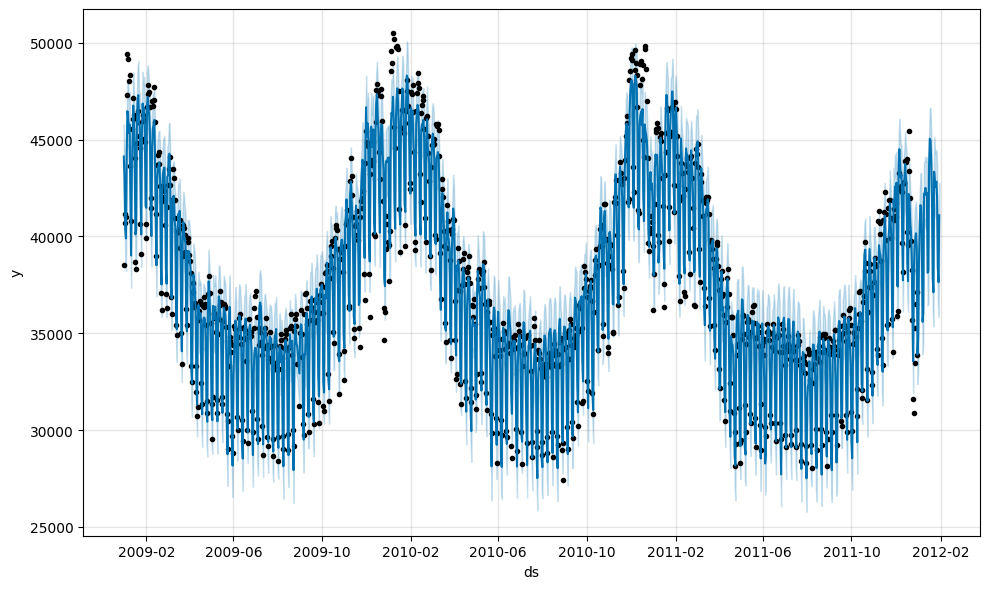

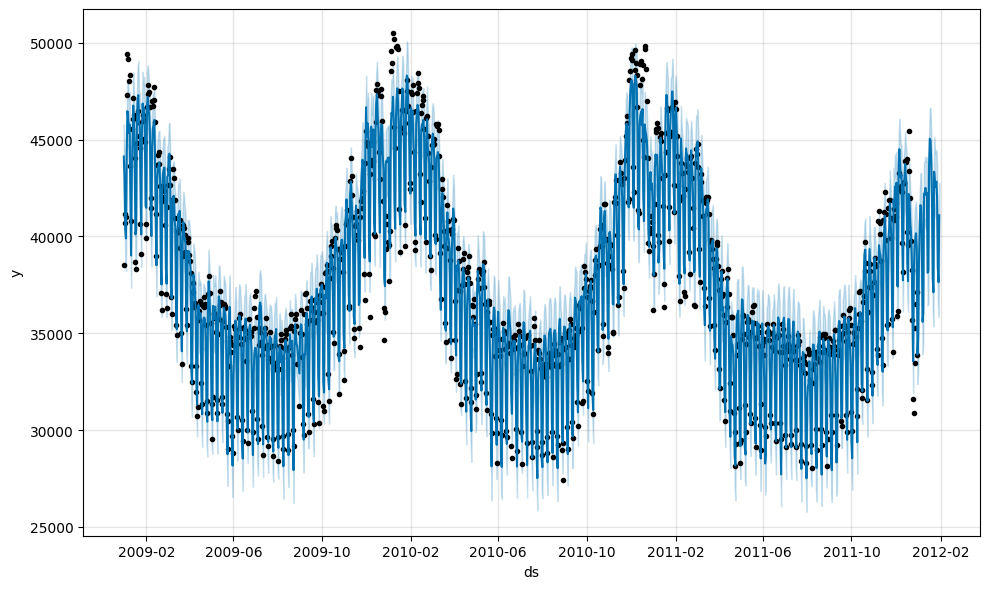

In [ ]:
m3.plot(forecast3)

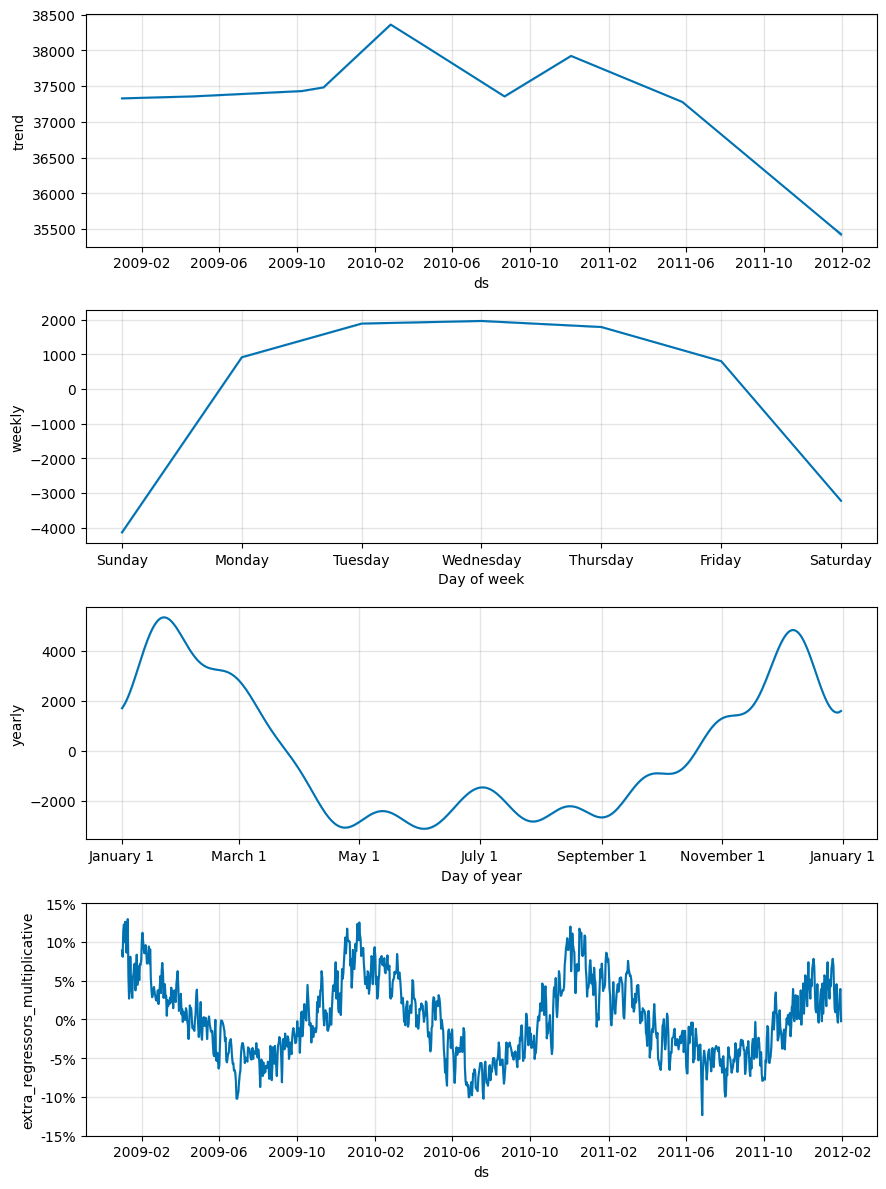

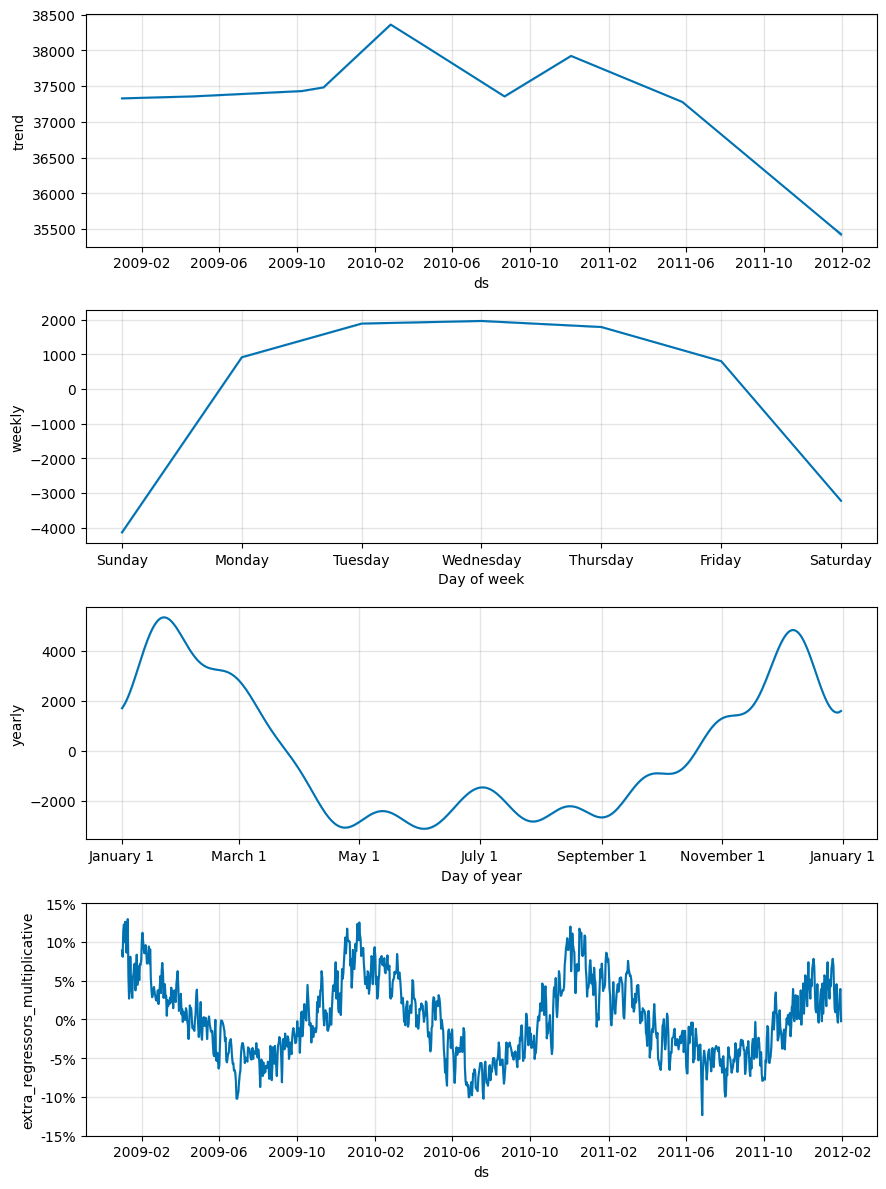

In [ ]:
m3.plot_components(forecast3)

In [ ]:
df_cv3 = cross_validation(m3,
                          initial="720 days",
                          period = "30 days",
                          horizon="60 days")

pm3 = performance_metrics(df_cv3)

INFO:prophet:Making 11 forecasts with cutoffs between 2011-01-05 00:00:00 and 2011-11-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/4zci_wn_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/yl9x9rdo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31641', 'data', 'file=/tmp/tmptwry0a66/4zci_wn_.json', 'init=/tmp/tmptwry0a66/yl9x9rdo.json', 'output', 'file=/tmp/tmptwry0a66/prophet_model4unbvytj/prophet_model-20240227175507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/ml8fadxy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/h62huk0x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

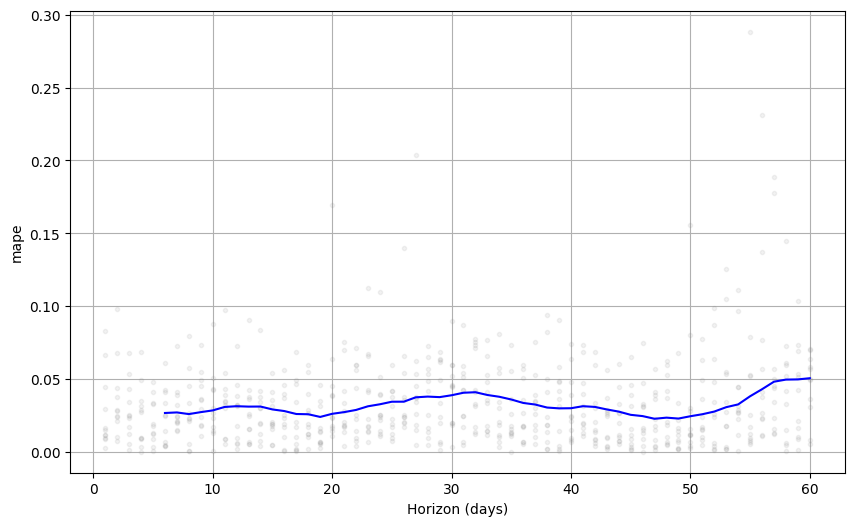

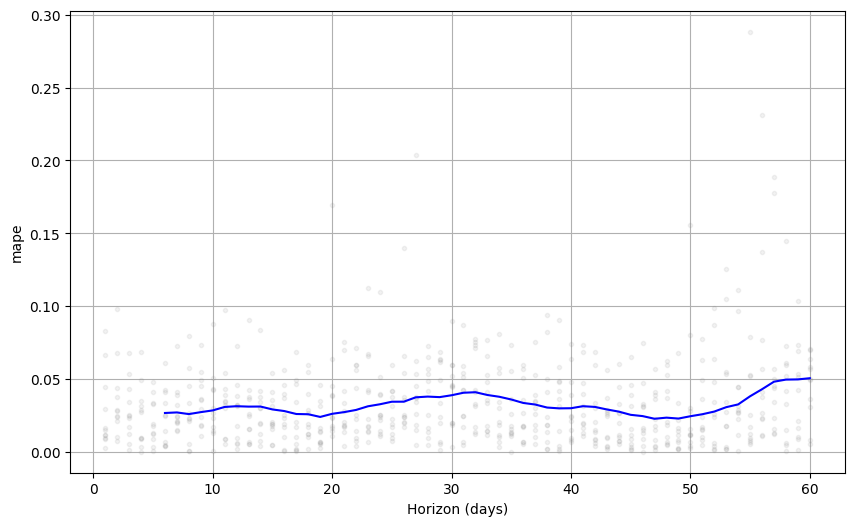

In [ ]:
plot_cross_validation_metric(df_cv3,metric="mape")

In [ ]:
print("MAPE without regressor: "+ str(round(pm["mape"].mean(),4))), # the first model where we had no holiday
print("MAPE with regressor holiday: "+ str(round(pm2["mape"].mean(),4))),# the model where we added UK holidays as regressor
print("MAPE with regressor holiday and weather: "+ str(round(pm3["mape"].mean(),4))) # the last model where we add extra regressor weather

MAPE without regressor: 0.0433
MAPE with regressor holiday: 0.0402
MAPE with regressor holiday and weather: 0.0322


trial with regressor additive

In [ ]:
m4= Prophet()
m4.add_regressor("temp", mode="additive")
m4.fit(df2)

future4 = m4.make_future_dataframe(periods=periods)
train_idx = future4['ds'].isin(df2.index)
test_idx = ~train_idx

reg = ["temp"]
for r in reg:
  future4.loc[train_idx, r] = df2[r].to_list()

for r in reg:
  future4.loc[test_idx, r] = df2.iloc[-30:][r].to_list()

forecast4 = m4.predict(future4)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/obq90mm_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/rf8g0rww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12106', 'data', 'file=/tmp/tmptwry0a66/obq90mm_.json', 'init=/tmp/tmptwry0a66/rf8g0rww.json', 'output', 'file=/tmp/tmptwry0a66/prophet_model_tdn13mg/prophet_model-20240227175513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_cv4 = cross_validation(m4,
                          initial="720 days",
                          period = "30 days",
                          horizon="60 days")

pm4 = performance_metrics(df_cv4)

INFO:prophet:Making 11 forecasts with cutoffs between 2011-01-05 00:00:00 and 2011-11-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/7q21qfa5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/fbf3zwas.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99919', 'data', 'file=/tmp/tmptwry0a66/7q21qfa5.json', 'init=/tmp/tmptwry0a66/fbf3zwas.json', 'output', 'file=/tmp/tmptwry0a66/prophet_model7ixmqt5s/prophet_model-20240227175514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/9ep5cnec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptwry0a66/y7vjnkmu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
print("Prophet MAPE without regressor: "+ str(round(pm["mape"].mean(),4))), # the first model where we had no holiday
print("Prophet MAPE with regressor holiday: "+ str(round(pm2["mape"].mean(),4))),# the model where we added UK holidays as regressor
print("Prophet MAPE with regressor holiday and weather: "+ str(round(pm3["mape"].mean(),4))) # the last model where we add extra regressor weather

print("Prophet sMAPE without regressor: "+ str(round(pm["smape"].mean(),4))), # the first model where we had no holiday
print("Prophet sMAPE with regressor holiday: "+ str(round(pm2["smape"].mean(),4))),# the model where we added UK holidays as regressor
print("Prophet sMAPE with regressor holiday and weather: "+ str(round(pm3["smape"].mean(),4))) # the last model where we add extra regressor weather

Prophet MAPE without regressor: 0.0433
Prophet MAPE with regressor holiday: 0.0402
Prophet MAPE with regressor holiday and weather: 0.0322
Prophet sMAPE without regressor: 0.0427
Prophet sMAPE with regressor holiday: 0.0395
Prophet sMAPE with regressor holiday and weather: 0.0318


Get user input for forecast best model is m3

In [ ]:
user_input_timestamp = pd.to_datetime("2012-02-03")
temperature = 10 # in the future try to predict also that
future_data = pd.DataFrame({"ds": [user_input_timestamp], "temp":temperature})
forecast = m3.predict(future_data)


In [ ]:
predicted_demand = round(forecast.loc[0, "yhat"],2)

df_raw['settlement_date'] = pd.to_datetime(df_raw['settlement_date'])
selected_row = df_raw[df_raw['settlement_date'] == user_input_timestamp]
tsd_value = selected_row['tsd'].iloc[0]

print(f'Predicted demand for {user_input_timestamp} is {predicted_demand} MW')
print(f'Actual demand for {user_input_timestamp} is {tsd_value} MW')

Predicted demand for 2012-02-03 00:00:00 is 40886.59 MW
Actual demand for 2012-02-03 00:00:00 is 40960 MW
